# Example 1: Oscillating Gaussian and Square

In [1]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from moviepy.editor import ipython_display
from utils import *

warnings.filterwarnings("ignore")

## Import PyDMD -- check that the branch is correct.

In [2]:
from pydmd import DMD, BOPDMD
from pydmd.plotter import plot_summary

# Check that the prox functionality is there:
bopdmd = BOPDMD(mode_regularizer="l0")

## Build the data set

In [3]:
# SET ALL DATA PARAMETERS:
nx = 40      # number of pixels along horizontal
ny = 40      # number of pixels along vertical
dt = 0.01    # time-step size
T = 10       # duration of the data set
f1 = 0.4     # frequency of mode 1
f2 = 2.0     # frequency of mode 2
sigma = 0.3  # noise magnitude

# Define the spatial and temporal grid.
x = np.arange(nx)
y = np.arange(ny)
Xgrid, Ygrid = np.meshgrid(x, y)
t = np.arange(0, T + dt, dt)
m = len(t)

# Define the Gaussian mode.
u1 = np.exp(-((Xgrid - (nx / 2)) ** 2) / nx - ((Ygrid - (ny / 2)) ** 2) / ny)
t1 = np.exp(1j * (2 * np.pi) * f1 * t)
X1 = np.outer(u1.flatten(), t1)

# Define the square mode.
u2 = np.zeros((nx, ny))
u2[nx - nx // 2: nx - nx // 8, ny - ny // 2: ny - ny // 8] = 1
t2 = np.exp(1j * (2 * np.pi) * f2 * t)
X2 = np.outer(u2.flatten(), t2)

# Build data matrix.
X_clean = X1 + X2
rng = np.random.default_rng(seed=1234)
X = X_clean + sigma * rng.standard_normal((nx * ny, m))
print("Data successfully generated!")
print(f"Data dimensions in (space, time): {X.shape}")

# make_video_2D(X, T, nx, ny, filename="data/gauss_square")
# # ipython_display("data/gauss_square.mp4")

Data successfully generated!
Data dimensions in (space, time): (1600, 1001)


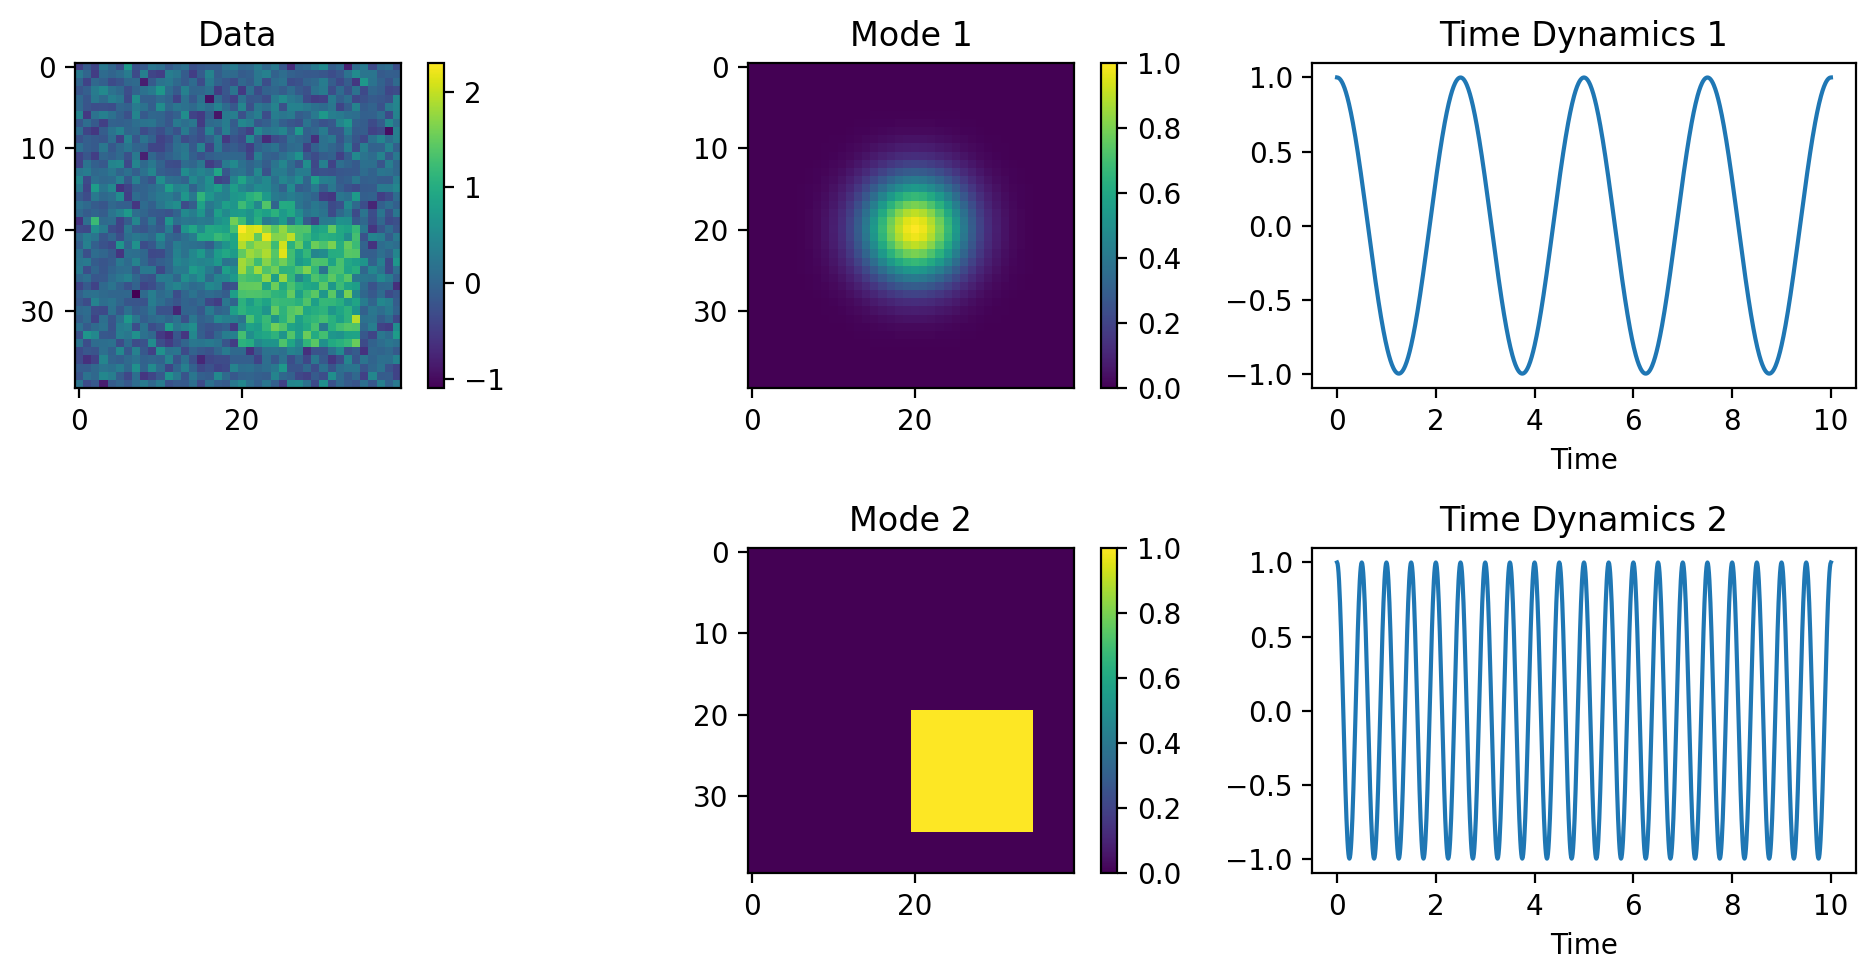

In [4]:
# Plot the data and the true spatiotemporal modes.
plt.figure(figsize=(10, 5), dpi=200)

plt.subplot(2, 3, 1)
plt.title("Data")
plt.imshow(X[:, 0].reshape(ny, nx, order="F").real)
plt.colorbar()

for i, u in enumerate([u1, u2]):
    plt.subplot(2, 3, 3 * i + 2)
    plt.title(f"Mode {i + 1}")
    plt.imshow(u.reshape(ny, nx, order="F").real, vmin=0, vmax=1)
    plt.colorbar()

for i, dynamics in enumerate([t1, t2]):
    plt.subplot(2, 3, 3 * i + 3)
    plt.title(f"Time Dynamics {i + 1}")
    plt.plot(t, dynamics.real)
    plt.xlabel("Time")

plt.tight_layout()
plt.show()

## Apply DMD

In [5]:
def plot_dmd_results(model):
    """
    Helper function for plotting DMD results for this particular data set.
    Given a fitted PyDMD model, plots the real components of the modes and
    the real components of the time dynamics that are stored in the model.
    """
    plt.figure(figsize=(10, 4), dpi=200)

    for i, u in enumerate(model.modes.T):
        plt.subplot(2, 2, 2 * i + 1)
        plt.title(f"Mode {i + 1}")
        vmax = 0.9 * np.abs(u).max()
        plt.imshow(
            u.reshape(ny, nx, order="F").real,
            vmax=vmax,
            vmin=-vmax,
            cmap="bwr",
        )
        plt.colorbar()

    for i, dynamics in enumerate(model.dynamics):
        plt.subplot(2, 2, 2 * i + 2)
        plt.title(f"Time Dynamics {i + 1}")
        plt.plot(t, dynamics.real)
        plt.xlabel("Time")

    plt.tight_layout()
    plt.show()

### Exact DMD

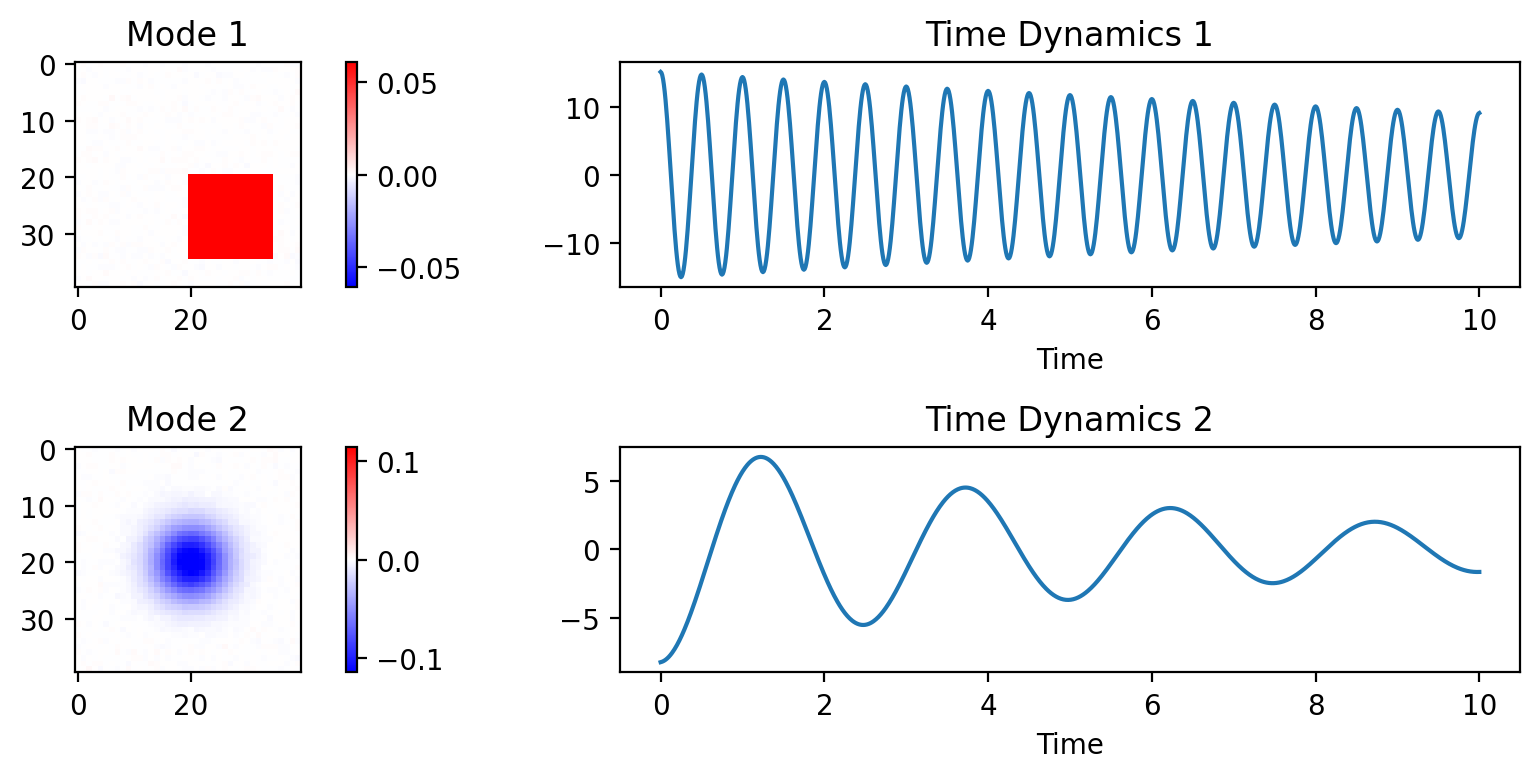

In [6]:
dmd = DMD(svd_rank=2)
dmd.fit(X)
plot_dmd_results(dmd)

### BOP-DMD

Step 1 Error 0.17213439906991926 Lambda 0.3333333333333333
Convergence reached!

Displaying the results of the next 5 trials...

Step 1 Error 0.1544617966521441 Lambda 0.3333333333333333
Convergence reached!

Step 1 Error 0.15227257481468134 Lambda 0.3333333333333333
Convergence reached!

Step 1 Error 0.15611218176405525 Lambda 0.3333333333333333
Convergence reached!

Step 1 Error 0.15312302020299515 Lambda 0.3333333333333333
Convergence reached!

Step 1 Error 0.1531994546393198 Lambda 0.3333333333333333
Convergence reached!



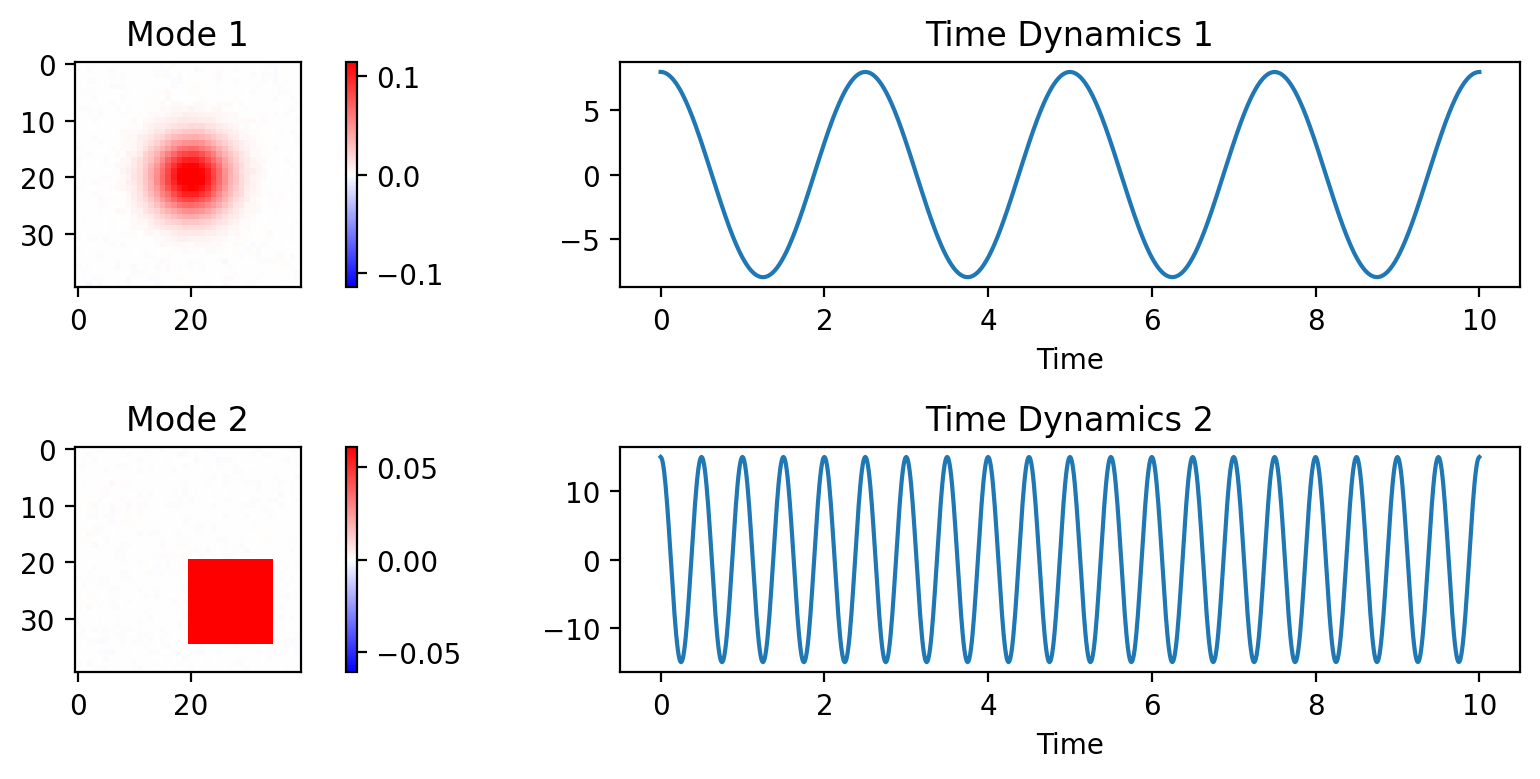

In [7]:
bopdmd = BOPDMD(
    svd_rank=2,
    num_trials=100,
    trial_size=0.8,
    varpro_opts_dict={"verbose":True, "tol":0.5},
)
bopdmd.fit(X, t)
plot_dmd_results(bopdmd)

### BOP-DMD with hard thresholding

In [8]:
gamma = 1 / np.linalg.norm(X, 2)
gamma

0.0020693878045427113

Error 1 = 1540.856048541146
Error 2 = 268.8398120140562
Error 1 = 2033.0710309006781
Error 2 = 434.89289223489453
Error 3 = 306.09162459487584
Error 4 = 374.0676993057382
Error 5 = 435.28601682123656
Error 6 = 303.65488018837164
Error 7 = 215.17424659798266
Error 1 = 2033.0626408166743
Error 2 = 434.8914741381515
Error 3 = 306.09094871959655
Error 4 = 374.0665073981125
Error 5 = 435.2844594173538
Error 6 = 303.65409772505245
Error 7 = 215.1742106004547
Error 1 = 2033.0290815597632
Error 2 = 434.8858019459159
Error 3 = 306.08824531741385
Error 4 = 374.06173993643154
Error 5 = 435.278230017047
Error 6 = 303.650967988682
Error 7 = 215.17406661441402
Error 1 = 2032.8948617859244
Error 2 = 434.86311629067905
Error 3 = 306.07743329064573
Error 4 = 374.04267278914216
Error 5 = 435.2533158571711
Error 6 = 303.63845091259776
Error 7 = 215.17349073537625
Error 1 = 2032.3582586251946
Error 2 = 434.77242346518136
Error 3 = 306.03421048200397
Error 4 = 373.9664473697865
Error 5 = 435.153714252915
E

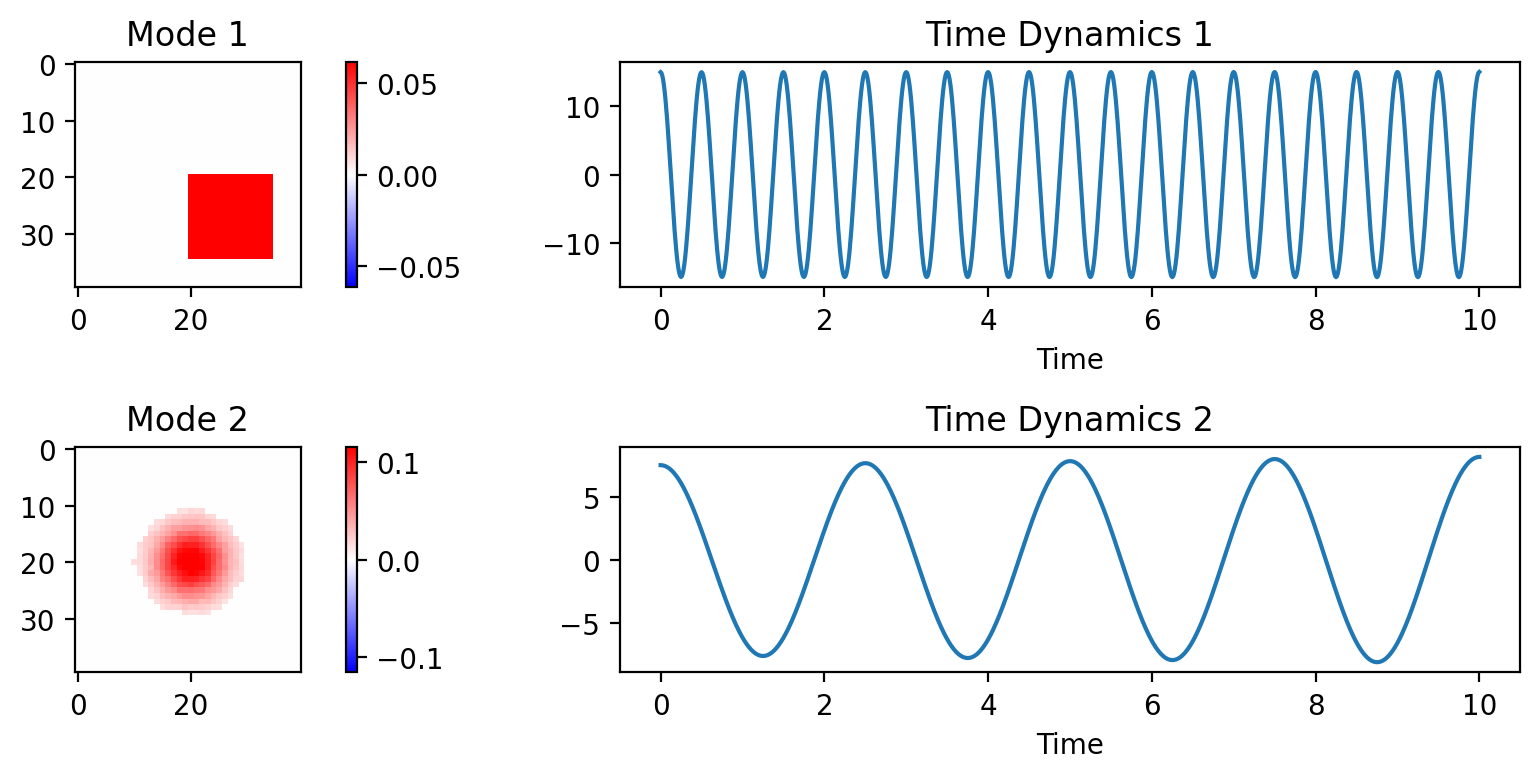

In [9]:
bopdmd_h = BOPDMD(
    svd_rank=2,
    num_trials=0,
    varpro_opts_dict={"verbose":True},
    use_proj=False,
    mode_regularizer="l0",
    mode_regularizer_kwargs={"lambda":10.0, "tol":300.0, "step_scale":gamma, "use_levmarq":True},
)
bopdmd_h.fit(X, t)
plot_dmd_results(bopdmd_h)

### BOP-DMD with soft thresholding

Error 1 = 1660.1232377345186
Error 2 = 344.3934792334205
Error 3 = 327.8607544210264
Error 4 = 319.5063920775099
Error 5 = 313.7967113537667
Error 6 = 307.1761496205917
Error 7 = 300.66264077796376
Error 8 = 297.31327261743354
Error 1 = 1843.59260531942
Error 2 = 417.521752152455
Error 3 = 391.6776275214023
Error 4 = 372.72554090631974
Error 5 = 361.1095709030673
Error 6 = 351.60391908041476
Error 7 = 344.4952663811658
Error 8 = 338.2329390349297
Error 9 = 334.2960541442736
Error 10 = 331.0308549335026

Step 1 Error 116.97374804287686 Lambda 0.3333333333333333
Error 1 = 2409.077787423396
Error 2 = 434.7960147684805
Error 3 = 414.13712248641906
Error 4 = 395.4753034929911
Error 5 = 380.4994659176331
Error 6 = 370.21986594051924
Error 7 = 360.7769267574735
Error 8 = 353.5352328282836
Error 9 = 347.70471468271734
Error 10 = 342.49622562496

Error 1 = 2409.0773587417643
Error 2 = 434.79600465662946
Error 3 = 414.1371084961521
Error 4 = 395.4752868548035
Error 5 = 380.4994517624643
Error 6 

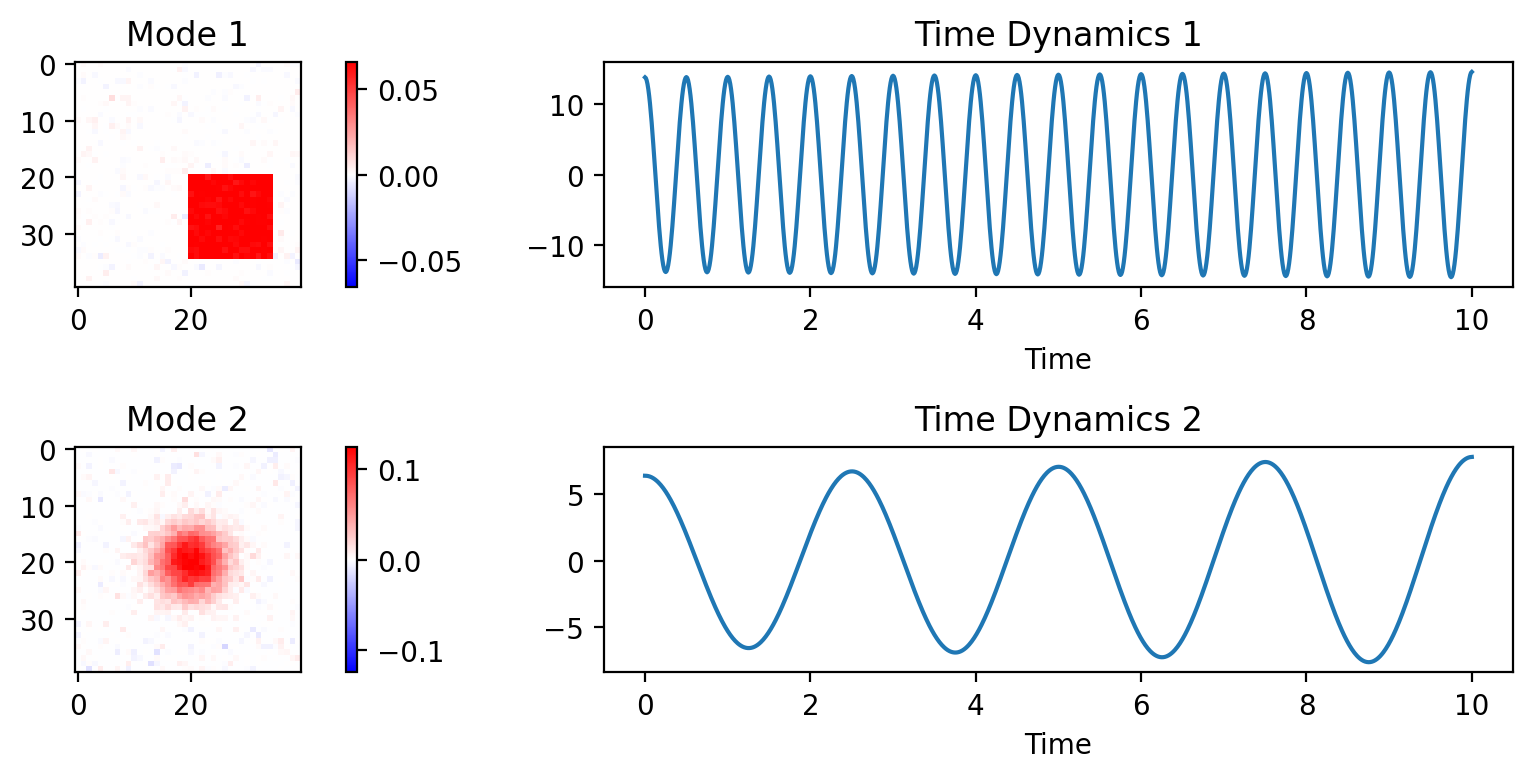

In [10]:
bopdmd_s = BOPDMD(
    svd_rank=2,
    num_trials=0,
    varpro_opts_dict={"verbose":True},
    use_proj=False,
    mode_regularizer="l1",
    mode_regularizer_kwargs={"lambda":10, "tol":300.0, "step_scale":gamma, "use_levmarq":True},
)
bopdmd_s.fit(X, t)
plot_dmd_results(bopdmd_s)

## Sparsity Level Experiments

In [11]:
# Fit an Optimized DMD model.
optdmd = BOPDMD(svd_rank=2, num_trials=0)
optdmd.fit(X, t)

# Record error.
optdmd_error = error(optdmd.reconstructed_data, X_clean)

### Hard Thresholding

In [12]:
# Lambda values to examine.
lambda_vals_h = np.arange(1, 20)

# Record errors with thresholding.
errors_h = np.zeros(len(lambda_vals_h))

print("Running hard threshold experiments...")
for i, _lambda in enumerate(lambda_vals_h):
    print(f"Examining lambda value {i + 1}")

    # Fit an Optimized DMD model.
    bopdmd_h = BOPDMD(
        svd_rank=2,
        num_trials=0,
        use_proj=False,
        mode_regularizer="l0",
        mode_regularizer_kwargs={"lambda":_lambda, "tol":300.0, "step_scale":gamma, "use_levmarq":True},
    )
    bopdmd_h.fit(X, t)

    # Record average error across random trials.
    errors_h[i] = error(bopdmd_h.reconstructed_data, X_clean)

print("Done!")

Running hard threshold experiments...
Examining lambda value 1
Examining lambda value 2
Examining lambda value 3
Examining lambda value 4
Examining lambda value 5
Examining lambda value 6
Examining lambda value 7
Examining lambda value 8
Examining lambda value 9
Examining lambda value 10
Examining lambda value 11
Examining lambda value 12
Examining lambda value 13
Examining lambda value 14
Examining lambda value 15
Examining lambda value 16
Examining lambda value 17
Examining lambda value 18
Examining lambda value 19
Done!


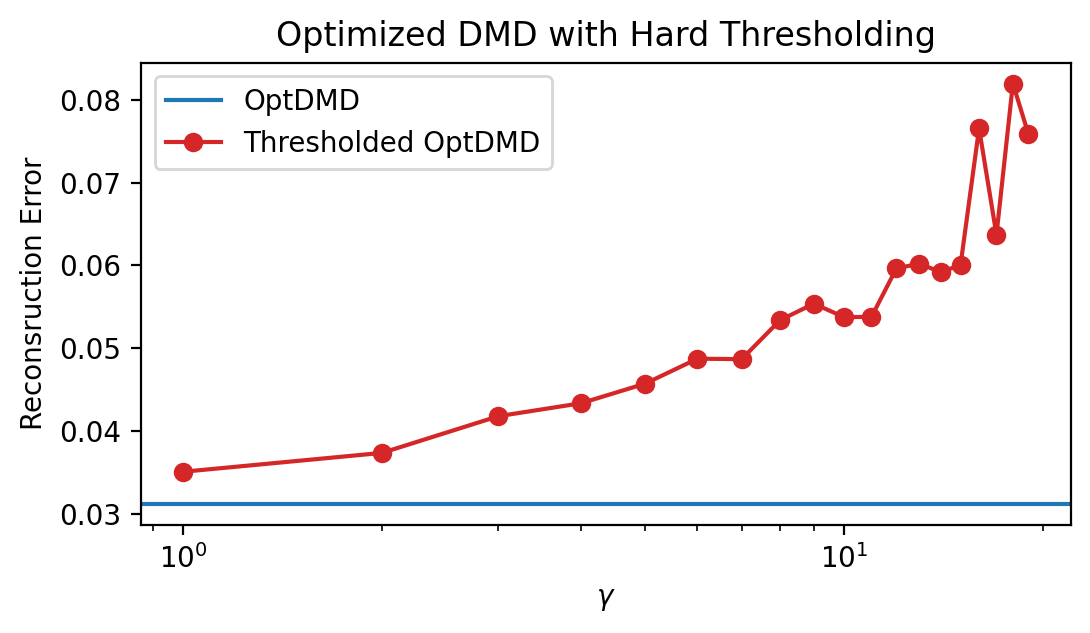

In [13]:
plt.figure(figsize=(6, 3), dpi=200)
plt.title("Optimized DMD with Hard Thresholding")
plt.axhline(y=optdmd_error, label="OptDMD")
plt.plot(lambda_vals_h, errors_h, "-o", c="tab:red", label="Thresholded OptDMD")
plt.xlabel("$\lambda$")
plt.ylabel("Reconsruction Error")
plt.semilogx()
plt.legend()
plt.show()

### Soft Thresholding

In [14]:
# Lambda values to examine.
lambda_vals_s = np.arange(1, 20)

# Record errors with thresholding.
errors_s = np.zeros(len(lambda_vals_s))

print("Running soft threshold experiments...")
for i, _lambda in enumerate(lambda_vals_s):
    print(f"Examining lambda value {i + 1}")

    # Fit an Optimized DMD model.
    bopdmd_s = BOPDMD(
        svd_rank=2,
        num_trials=0,
        use_proj=False,
        mode_regularizer="l1",
        mode_regularizer_kwargs={"lambda":_lambda,
                                 "tol":300.0, "step_scale":gamma, "use_levmarq":True},
    )
    bopdmd_s.fit(X, t)

    # Record average error across random trials.
    errors_s[i] = error(bopdmd_s.reconstructed_data, X_clean)

print("Done!")

Running soft threshold experiments...
Examining lambda value 1
Examining lambda value 2
Examining lambda value 3
Examining lambda value 4
Examining lambda value 5
Examining lambda value 6
Examining lambda value 7
Examining lambda value 8
Examining lambda value 9
Examining lambda value 10
Examining lambda value 11
Examining lambda value 12
Examining lambda value 13
Examining lambda value 14
Examining lambda value 15
Examining lambda value 16
Examining lambda value 17
Examining lambda value 18
Examining lambda value 19
Done!


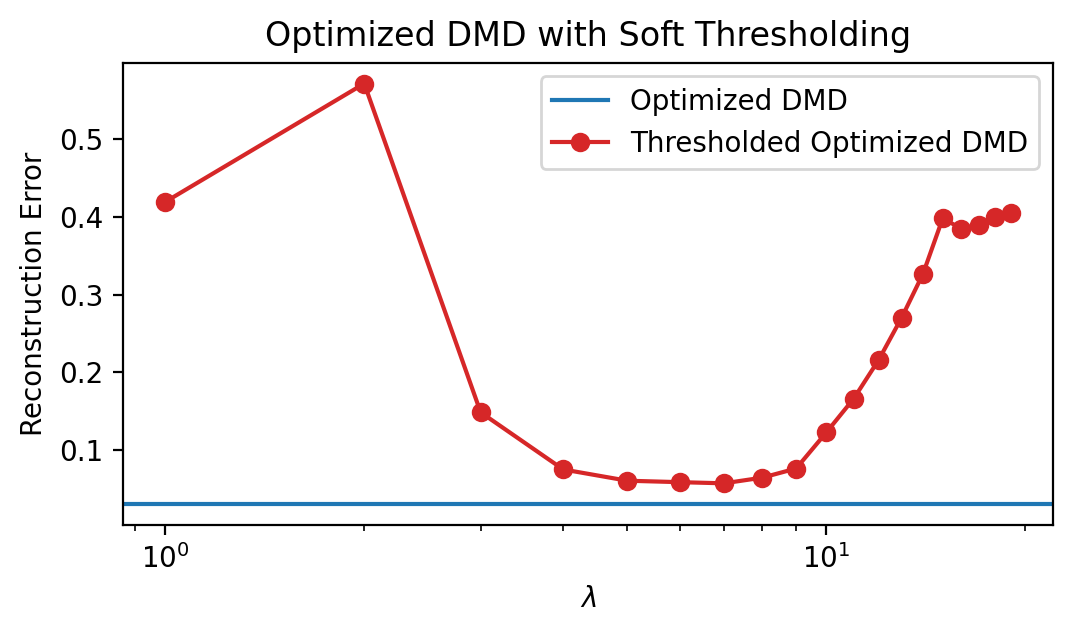

In [15]:
plt.figure(figsize=(6, 3), dpi=200)
plt.title("Optimized DMD with Soft Thresholding")
plt.axhline(y=optdmd_error, label="Optimized DMD")
plt.plot(lambda_vals_s, errors_s, "-o", c="tab:red", label="Thresholded Optimized DMD")
plt.xlabel("$\lambda$")
plt.ylabel("Reconstruction Error")
plt.semilogx()
plt.legend()
plt.show()